In [2]:
#설정
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "ML_PATH"
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
#scikit learn을 이용한 perceptron 구현
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


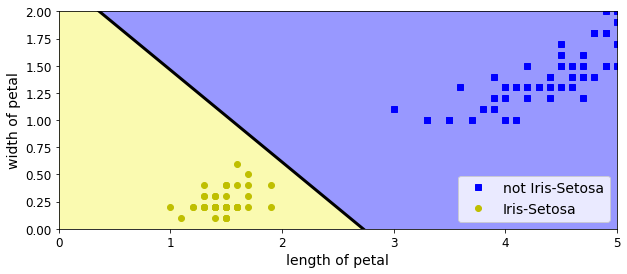

In [7]:
#그림 구현
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("length of petal", fontsize=14)
plt.ylabel("width of petal", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [9]:
#활성화 함수
def logit(z):
    return 1 / (1 + np.exp(-z)) #로짓함수

def relu(z):
    return np.maximum(0, z) #relu 함수

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps) 

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


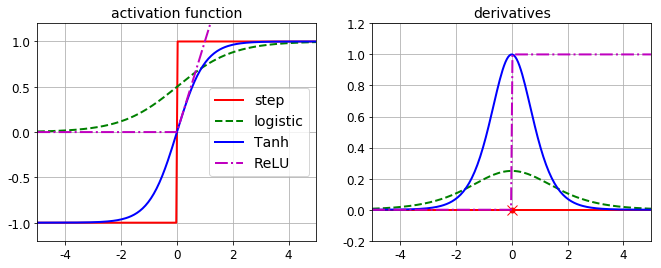

In [10]:
#그림
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step")
plt.plot(z, logit(z), "g--", linewidth=2, label="logistic")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("activation function", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [11]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


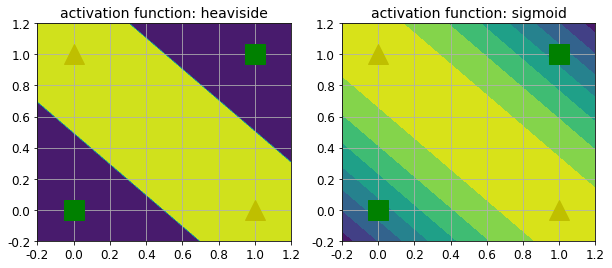

In [12]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("activation function: sigmoid", fontsize=14)
plt.grid(True)

In [16]:
##다중 퍼셉트론 훈련 시키기
#tf.contrib.learn을 사용
#데이터 불러오기
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [17]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [30]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) # 책에는 없음

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train) #입력층 구성을 위한 실숫값 열 만들기
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config) #은닉층 2개(뉴런이 각각 300, 100개), 출력층 10개인 퍼셉트론 훈련
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1, scikit learn과 호환
tf.logging.set_verbosity(tf.logging.INFO)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000) #샘플이 50개인 batch로 40000번 반복

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001238244EB00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmpc5xfteqq'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\admin\AppData\Local\Temp\tmpc5xfteqq\model.ckpt.
INFO:tensorflow:loss = 2.2865596, step = 1
INFO:tensor

INFO:tensorflow:global_step/sec: 176.466
INFO:tensorflow:loss = 0.021515386, step = 7201 (0.568 sec)
INFO:tensorflow:global_step/sec: 167.601
INFO:tensorflow:loss = 0.006165936, step = 7301 (0.596 sec)
INFO:tensorflow:global_step/sec: 176.778
INFO:tensorflow:loss = 0.022128865, step = 7401 (0.567 sec)
INFO:tensorflow:global_step/sec: 171.331
INFO:tensorflow:loss = 0.003582832, step = 7501 (0.584 sec)
INFO:tensorflow:global_step/sec: 180.61
INFO:tensorflow:loss = 0.032321744, step = 7601 (0.553 sec)
INFO:tensorflow:global_step/sec: 174.316
INFO:tensorflow:loss = 0.012667825, step = 7701 (0.574 sec)
INFO:tensorflow:global_step/sec: 180.934
INFO:tensorflow:loss = 0.0044390447, step = 7801 (0.554 sec)
INFO:tensorflow:global_step/sec: 177.093
INFO:tensorflow:loss = 0.009541411, step = 7901 (0.565 sec)
INFO:tensorflow:global_step/sec: 177.722
INFO:tensorflow:loss = 0.0031771993, step = 8001 (0.562 sec)
INFO:tensorflow:global_step/sec: 182.252
INFO:tensorflow:loss = 0.019440843, step = 8101 (

INFO:tensorflow:global_step/sec: 177.721
INFO:tensorflow:loss = 0.0029083695, step = 15301 (0.562 sec)
INFO:tensorflow:global_step/sec: 177.721
INFO:tensorflow:loss = 0.0032810932, step = 15401 (0.563 sec)
INFO:tensorflow:global_step/sec: 174.925
INFO:tensorflow:loss = 0.0067370986, step = 15501 (0.573 sec)
INFO:tensorflow:global_step/sec: 178.674
INFO:tensorflow:loss = 0.0038741142, step = 15601 (0.559 sec)
INFO:tensorflow:global_step/sec: 180.284
INFO:tensorflow:loss = 0.009774149, step = 15701 (0.556 sec)
INFO:tensorflow:global_step/sec: 177.406
INFO:tensorflow:loss = 0.0010816352, step = 15801 (0.564 sec)
INFO:tensorflow:global_step/sec: 177.407
INFO:tensorflow:loss = 0.00045454022, step = 15901 (0.564 sec)
INFO:tensorflow:global_step/sec: 178.673
INFO:tensorflow:loss = 0.0083190445, step = 16001 (0.559 sec)
INFO:tensorflow:global_step/sec: 175.23
INFO:tensorflow:loss = 0.002462699, step = 16101 (0.572 sec)
INFO:tensorflow:global_step/sec: 182.921
INFO:tensorflow:loss = 8.13979e-05

INFO:tensorflow:global_step/sec: 171.92
INFO:tensorflow:loss = 0.0020676628, step = 23301 (0.582 sec)
INFO:tensorflow:global_step/sec: 182.585
INFO:tensorflow:loss = 0.0008949523, step = 23401 (0.548 sec)
INFO:tensorflow:global_step/sec: 178.039
INFO:tensorflow:loss = 0.0005978011, step = 23501 (0.563 sec)
INFO:tensorflow:global_step/sec: 177.406
INFO:tensorflow:loss = 0.0005685245, step = 23601 (0.564 sec)
INFO:tensorflow:global_step/sec: 182.255
INFO:tensorflow:loss = 0.00037954125, step = 23701 (0.548 sec)
INFO:tensorflow:global_step/sec: 179.957
INFO:tensorflow:loss = 0.0012525885, step = 23801 (0.557 sec)
INFO:tensorflow:global_step/sec: 177.095
INFO:tensorflow:loss = 0.0018095257, step = 23901 (0.565 sec)
INFO:tensorflow:global_step/sec: 158.068
INFO:tensorflow:loss = 0.0009371035, step = 24001 (0.632 sec)
INFO:tensorflow:global_step/sec: 178.673
INFO:tensorflow:loss = 0.00045117378, step = 24101 (0.561 sec)
INFO:tensorflow:global_step/sec: 178.994
INFO:tensorflow:loss = 0.001515

INFO:tensorflow:global_step/sec: 172.217
INFO:tensorflow:loss = 0.00054957217, step = 31301 (0.581 sec)
INFO:tensorflow:global_step/sec: 153.934
INFO:tensorflow:loss = 0.0010618106, step = 31401 (0.655 sec)
INFO:tensorflow:global_step/sec: 165.932
INFO:tensorflow:loss = 0.00015994758, step = 31501 (0.599 sec)
INFO:tensorflow:global_step/sec: 180.284
INFO:tensorflow:loss = 0.0003695928, step = 31601 (0.556 sec)
INFO:tensorflow:global_step/sec: 174.926
INFO:tensorflow:loss = 0.00056628115, step = 31701 (0.571 sec)
INFO:tensorflow:global_step/sec: 169.016
INFO:tensorflow:loss = 0.00029698218, step = 31801 (0.591 sec)
INFO:tensorflow:global_step/sec: 165.382
INFO:tensorflow:loss = 0.0007819244, step = 31901 (0.606 sec)
INFO:tensorflow:global_step/sec: 169.59
INFO:tensorflow:loss = 0.00041287058, step = 32001 (0.589 sec)
INFO:tensorflow:global_step/sec: 173.11
INFO:tensorflow:loss = 0.00042724676, step = 32101 (0.578 sec)
INFO:tensorflow:global_step/sec: 169.588
INFO:tensorflow:loss = 0.000

INFO:tensorflow:loss = 0.00040228284, step = 39201 (0.545 sec)
INFO:tensorflow:global_step/sec: 168.164
INFO:tensorflow:loss = 0.0003179687, step = 39301 (0.590 sec)
INFO:tensorflow:global_step/sec: 175.539
INFO:tensorflow:loss = 0.000579831, step = 39401 (0.569 sec)
INFO:tensorflow:global_step/sec: 182.587
INFO:tensorflow:loss = 0.00028533713, step = 39501 (0.549 sec)
INFO:tensorflow:global_step/sec: 168.446
INFO:tensorflow:loss = 0.00049217866, step = 39601 (0.594 sec)
INFO:tensorflow:global_step/sec: 165.112
INFO:tensorflow:loss = 0.00019948884, step = 39701 (0.605 sec)
INFO:tensorflow:global_step/sec: 182.254
INFO:tensorflow:loss = 0.0011345267, step = 39801 (0.549 sec)
INFO:tensorflow:global_step/sec: 186.673
INFO:tensorflow:loss = 0.00074503996, step = 39901 (0.537 sec)
INFO:tensorflow:Saving checkpoints for 40000 into C:\Users\admin\AppData\Local\Temp\tmpc5xfteqq\model.ckpt.
INFO:tensorflow:Loss for final step: 0.00044901937.


SKCompat()

In [31]:
#정확도 측정
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmpc5xfteqq\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9824

In [32]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.0698630910598555

In [20]:
#tf.estimator와 tf.feature_column이용(Estimator API를 사용)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0 #train과 test에 대한 동일한 스케일 적용
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================]11493376/11490434 [==============================] - 8s 1us/step



In [24]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])] #입력층에 해당되는 실숫값 만들기
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10, #다층 퍼셉트론 훈련
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True) #샘플이 50개인 배치로 40번 반복
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\admin\\AppData\\Local\\Temp\\tmp9vgi3ie3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001238163EE48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\admin\AppData\Local\Temp\tmp9vgi3ie3

INFO:tensorflow:loss = 0.7672281, step = 7201 (0.635 sec)
INFO:tensorflow:global_step/sec: 156.34
INFO:tensorflow:loss = 3.0413043, step = 7301 (0.640 sec)
INFO:tensorflow:global_step/sec: 161.122
INFO:tensorflow:loss = 0.6647991, step = 7401 (0.621 sec)
INFO:tensorflow:global_step/sec: 154.41
INFO:tensorflow:loss = 0.6802055, step = 7501 (0.649 sec)
INFO:tensorflow:global_step/sec: 154.172
INFO:tensorflow:loss = 0.12762031, step = 7601 (0.649 sec)
INFO:tensorflow:global_step/sec: 158.821
INFO:tensorflow:loss = 0.25805786, step = 7701 (0.629 sec)
INFO:tensorflow:global_step/sec: 143.349
INFO:tensorflow:loss = 0.25358194, step = 7801 (0.705 sec)
INFO:tensorflow:global_step/sec: 153.462
INFO:tensorflow:loss = 0.5059871, step = 7901 (0.645 sec)
INFO:tensorflow:global_step/sec: 135.948
INFO:tensorflow:loss = 0.52138245, step = 8001 (0.738 sec)
INFO:tensorflow:global_step/sec: 116.21
INFO:tensorflow:loss = 0.6236702, step = 8101 (0.865 sec)
INFO:tensorflow:global_step/sec: 133.055
INFO:tens

INFO:tensorflow:global_step/sec: 104.992
INFO:tensorflow:loss = 0.31568182, step = 15401 (0.947 sec)
INFO:tensorflow:global_step/sec: 110.195
INFO:tensorflow:loss = 0.24978584, step = 15501 (0.912 sec)
INFO:tensorflow:global_step/sec: 115.273
INFO:tensorflow:loss = 0.07813247, step = 15601 (0.862 sec)
INFO:tensorflow:global_step/sec: 112.297
INFO:tensorflow:loss = 0.14048497, step = 15701 (0.891 sec)
INFO:tensorflow:global_step/sec: 132.177
INFO:tensorflow:loss = 0.122693956, step = 15801 (0.757 sec)
INFO:tensorflow:global_step/sec: 105.323
INFO:tensorflow:loss = 0.022562461, step = 15901 (0.948 sec)
INFO:tensorflow:global_step/sec: 103.794
INFO:tensorflow:loss = 0.019059068, step = 16001 (0.964 sec)
INFO:tensorflow:global_step/sec: 154.409
INFO:tensorflow:loss = 0.2804727, step = 16101 (0.647 sec)
INFO:tensorflow:global_step/sec: 140.925
INFO:tensorflow:loss = 0.0593296, step = 16201 (0.712 sec)
INFO:tensorflow:global_step/sec: 148.453
INFO:tensorflow:loss = 0.16314462, step = 16301 (

INFO:tensorflow:global_step/sec: 142.734
INFO:tensorflow:loss = 0.00095704186, step = 23501 (0.699 sec)
INFO:tensorflow:global_step/sec: 161.123
INFO:tensorflow:loss = 0.06090389, step = 23601 (0.620 sec)
INFO:tensorflow:global_step/sec: 159.582
INFO:tensorflow:loss = 0.032513287, step = 23701 (0.627 sec)
INFO:tensorflow:global_step/sec: 149.786
INFO:tensorflow:loss = 0.12060531, step = 23801 (0.669 sec)
INFO:tensorflow:global_step/sec: 158.821
INFO:tensorflow:loss = 0.0048404196, step = 23901 (0.629 sec)
INFO:tensorflow:global_step/sec: 155.852
INFO:tensorflow:loss = 0.0043434245, step = 24001 (0.643 sec)
INFO:tensorflow:global_step/sec: 156.584
INFO:tensorflow:loss = 0.018071944, step = 24101 (0.638 sec)
INFO:tensorflow:global_step/sec: 148.233
INFO:tensorflow:loss = 0.027546179, step = 24201 (0.676 sec)
INFO:tensorflow:global_step/sec: 152.526
INFO:tensorflow:loss = 0.014539644, step = 24301 (0.655 sec)
INFO:tensorflow:global_step/sec: 155.852
INFO:tensorflow:loss = 0.023508566, ste

INFO:tensorflow:global_step/sec: 161.643
INFO:tensorflow:loss = 0.018966833, step = 31601 (0.618 sec)
INFO:tensorflow:global_step/sec: 154.886
INFO:tensorflow:loss = 0.0026311425, step = 31701 (0.647 sec)
INFO:tensorflow:global_step/sec: 154.649
INFO:tensorflow:loss = 0.01955715, step = 31801 (0.647 sec)
INFO:tensorflow:global_step/sec: 158.57
INFO:tensorflow:loss = 0.0059451326, step = 31901 (0.630 sec)
INFO:tensorflow:global_step/sec: 155.368
INFO:tensorflow:loss = 0.012687178, step = 32001 (0.645 sec)
INFO:tensorflow:global_step/sec: 163.76
INFO:tensorflow:loss = 0.019466188, step = 32101 (0.610 sec)
INFO:tensorflow:global_step/sec: 139.355
INFO:tensorflow:loss = 0.03544295, step = 32201 (0.724 sec)
INFO:tensorflow:global_step/sec: 160.606
INFO:tensorflow:loss = 0.0072084577, step = 32301 (0.617 sec)
INFO:tensorflow:global_step/sec: 150.236
INFO:tensorflow:loss = 0.00671177, step = 32401 (0.666 sec)
INFO:tensorflow:global_step/sec: 155.369
INFO:tensorflow:loss = 0.030913167, step = 

INFO:tensorflow:loss = 0.004970018, step = 39601 (0.626 sec)
INFO:tensorflow:global_step/sec: 158.319
INFO:tensorflow:loss = 0.019105796, step = 39701 (0.632 sec)
INFO:tensorflow:global_step/sec: 154.887
INFO:tensorflow:loss = 0.011008655, step = 39801 (0.646 sec)
INFO:tensorflow:global_step/sec: 158.068
INFO:tensorflow:loss = 0.016480537, step = 39901 (0.633 sec)
INFO:tensorflow:global_step/sec: 156.585
INFO:tensorflow:loss = 0.007950156, step = 40001 (0.639 sec)
INFO:tensorflow:global_step/sec: 154.887
INFO:tensorflow:loss = 0.0010014595, step = 40101 (0.647 sec)
INFO:tensorflow:global_step/sec: 158.319
INFO:tensorflow:loss = 0.023648154, step = 40201 (0.632 sec)
INFO:tensorflow:global_step/sec: 157.076
INFO:tensorflow:loss = 0.0193156, step = 40301 (0.636 sec)
INFO:tensorflow:global_step/sec: 145.432
INFO:tensorflow:loss = 0.015140921, step = 40401 (0.688 sec)
INFO:tensorflow:global_step/sec: 152.993
INFO:tensorflow:loss = 0.05673674, step = 40501 (0.654 sec)
INFO:tensorflow:global_

In [25]:
#test set으로 검정
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-27-02:05:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmp9vgi3ie3\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-27-02:05:52
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9797, average_loss = 0.10760154, global_step = 44000, loss = 13.620448


In [26]:
eval_results

{'accuracy': 0.9797,
 'average_loss': 0.10760154,
 'global_step': 44000,
 'loss': 13.620448}

In [27]:
#확률 계산
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\admin\AppData\Local\Temp\tmp9vgi3ie3\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -2.93572   ,  -3.0383208 ,  -0.33825928,   2.7525818 ,
        -14.783419  ,  -2.8781145 , -16.19952   ,  23.42171   ,
         -3.8607926 ,  -1.9268929 ], dtype=float32),
 'probabilities': array([3.5736648e-12, 3.2251888e-12, 4.7992912e-11, 1.0556317e-09,
        2.5569595e-17, 3.7855734e-12, 6.2046599e-18, 1.0000000e+00,
        1.4169688e-12, 9.8003567e-12], dtype=float32)}

In [33]:
##저수준의 TensorFlow API을 이용한 MNIST 분류
##구성 단계
#특성수, 은닉층, 뉴런의 갯수, 출력뉴런 갯수 지정
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [34]:
#graph에 사용될 placeholder 만들기
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X") #none의 크기는 배치의 크기, 입력층의 역할
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [35]:
#층 만들기
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1]) #입력 특성의 수(m,n중 n)
        stddev = 2 / np.sqrt(n_inputs) #알고리즘을 빠르게 만들어주는 위대한 변화중 하나
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev) #해당 표준편차를 사용한 절단 정규 분포(이를 이용해 w를 무작위로 초기화)
        W = tf.Variable(init, name="kernel") #각 입력과 각 뉴런사이의 모든 가중치를 담고있는 2D tensor
        b = tf.Variable(tf.zeros([n_neurons]), name="bias") #뉴런마다 편향을 할당
        Z = tf.matmul(X, W) + b #가중치와 입력에 편향을 더해줌
        if activation is not None: #활성화 함수를 이용하여 가중치를 동반한 값을 출력할지 아닐지를 결정
            return activation(Z)
        else:
            return Z

In [36]:
#심층 신경망 구성
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [37]:
#비용함수 정의하기
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [38]:
#자동미분을 이용한 비용함수 최소화(gradientoptimizer)
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [39]:
#평가 방법 지정
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1) #logit이 y의 1번째(크기)이면 True 아니면 False
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) #실수로 변형하고 평균

In [40]:
#변수를 초기화하고 저장을 위한 saver객체 생성
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [41]:
##실행 단계
#반복수와 batch size지정
n_epochs = 40
batch_size = 50

In [42]:
#샘플에서 랜덤으로 미니배치를 뽑는 함수
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [43]:
#모델 훈련
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size): #미니 배치 생성 과정
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch}) #비용함수 최소화 과정
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch}) #train set를 이용하여 계산한 정확도
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid}) #valid set을 이용하여 계산한 정확도
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.88 검증 세트 정확도: 0.9182
1 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9346
2 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9412
3 배치 데이터 정확도: 0.88 검증 세트 정확도: 0.9476
4 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9524
5 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9554
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9622
7 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9642
8 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9674
9 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.968
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9702
11 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.971
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.969
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9704
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9712
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.972
16 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9728
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9732
18 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9746
19 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.974
20 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9742
21 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9748
22 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9758
23 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9768
24 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9766
25 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9764
26 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.976

In [44]:
#훈련된 모델을 이용하여 예측
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # 또는 save_path를 사용합니다(디스크로부터 모델 파라미터를 불러옴)
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled}) #각 샘플이 10개의 타깃값에 각각 속할 확률을 계산
    y_pred = np.argmax(Z, axis=1) #그 중 가장 큰값을 return

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [45]:
print("예측 클래스:", y_pred)
print("진짜 클래스:", y_test[:20])

예측 클래스: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
진짜 클래스: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [50]:
#neuron_layer() 대신 dense() 사용 (tensorflow에서 층을 만들어주는 함수 이용)
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [51]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [52]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", #dense() 함수 이용
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits) #활성화 함수 정의

In [53]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits) #비용함수 정의
    loss = tf.reduce_mean(xentropy, name="loss") #비용

In [54]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate) #비용함수를 최소화 하기 위한 경사하강법 정의
    training_op = optimizer.minimize(loss)

In [55]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) #평가 함수 정의

In [56]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [57]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.86 검증 세트 정확도: 0.9042
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9222
2 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9332
3 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9398
4 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9468
5 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9498
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9562
7 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.957
8 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.961
9 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9616
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9656
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9664
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9682
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9692
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9706
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9708
16 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9732
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.973
18 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9746
19 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.975
